In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("churn_prediction_simple.csv")
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
customer_id                       22067 non-null int64
vintage                           22067 non-null int64
age                               22067 non-null int64
gender                            22067 non-null int64
dependents                        22067 non-null float64
occupation                        22067 non-null int64
city                              22067 non-null float64
customer_nw_category              22067 non-null int64
branch_code                       22067 non-null int64
days_since_last_transaction       22067 non-null float64
current_balance                   22067 non-null float64
previous_month_end_balance        22067 non-null float64
average_monthly_balance_prevQ     22067 non-null float64
average_monthly_balance_prevQ2    22067 non-null float64
current_month_credit              22067 non-null float64
previous_month_credit             22067 non-null f

In [6]:
#check the database distribution
df['churn'].value_counts()/len(df)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [7]:
# separate dependent and independent variables
X = df.drop(columns = ['churn','customer_id'])
Y = df['churn']

In [8]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
#splitting the dataset
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(scaled_X,Y,train_size =0.8,stratify =Y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

## Model Building, predictions and odds ratio


In [10]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight ='balanced')

In [11]:
classifier.fit(x_train,y_train)
predicted_value = classifier.predict(x_test)
predicted_value

F:\New folder\New folder (2)\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
predicted_prob = classifier.predict_proba(x_test)
predicted_prob

array([[0.57239119, 0.42760881],
       [0.4817222 , 0.5182778 ],
       [0.42567636, 0.57432364],
       ...,
       [0.5103167 , 0.4896833 ],
       [0.55767433, 0.44232567],
       [0.51261539, 0.48738461]])

### Evaluation Metrics

In [13]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted_value)
cf

array([[2785,  774],
       [ 322,  533]], dtype=int64)

In [14]:
#accuracy
classifier.score(x_test,y_test)

0.7516991391028546

In [15]:
from sklearn.metrics import precision_score
Precision =precision_score(y_test,predicted_value)
Precision

0.40780413159908185

In [16]:
from sklearn.metrics import recall_score
recall =recall_score(y_test,predicted_value)
recall

0.623391812865497

In [17]:
f1= 2/((1/Precision)+(1/recall))
f1

0.4930619796484736

In [18]:
from sklearn.metrics import f1_score
F1 =f1_score(y_test,predicted_value)
F1

0.49306197964847365

In [19]:
#cal p, recall,fscore nd support at once
from sklearn.metrics import precision_recall_fscore_support as PRF
p,r,f1,support =PRF(y_test,predicted_value)
p,r,f1,support

(array([0.89636305, 0.40780413]),
 array([0.78252318, 0.62339181]),
 array([0.83558356, 0.49306198]),
 array([3559,  855], dtype=int64))

In [20]:
from sklearn.metrics import classification_report
k =classification_report(y_test,predicted_value)
print(k)


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      3559
           1       0.41      0.62      0.49       855

    accuracy                           0.75      4414
   macro avg       0.65      0.70      0.66      4414
weighted avg       0.80      0.75      0.77      4414



## Precision recall curve

In [21]:
#gathering pre -recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
pre_points, rcall_pt,threshold_point = precision_recall_curve(y_test,predicted_prob[:,1])
pre_points.shape, rcall_pt.shape,threshold_point.shape

((4410,), (4410,), (4409,))

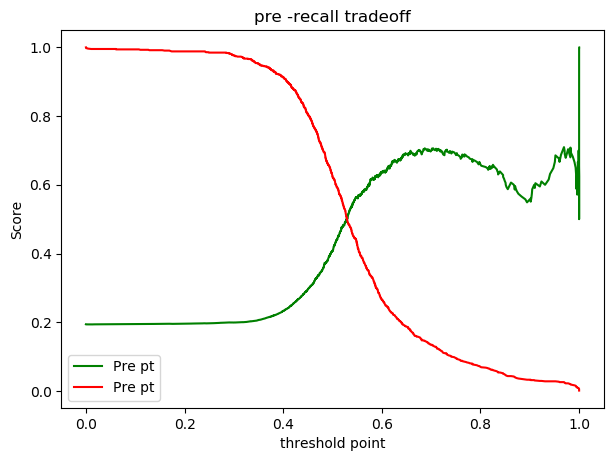

In [22]:
plt.figure(figsize=(7,5),dpi=100)
plt.plot(threshold_point,pre_points[:-1],color='green',label='Pre pt')
plt.plot(threshold_point,rcall_pt[:-1],color='red',label='Pre pt')
plt.xlabel('threshold point')
plt.ylabel('Score')
plt.title('pre -recall tradeoff')
plt.legend()

## AUC ROC Curve

In [23]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,predicted_prob[:,1])

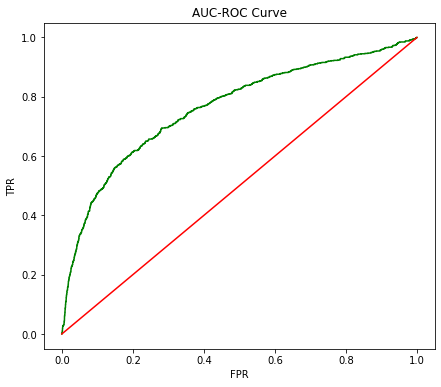

In [24]:
plt.figure(figsize=(7,6))
plt.plot(fpr,tpr,color='green')
plt.plot([0,1],[0,1],label='baseline',color='red')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC Curve')
plt.show()


In [25]:
roc_auc_score(y_test,predicted_prob[:,1])

0.7624705671643753

## Coefficient Plot

In [27]:
#arranging the data
c=classifier.coef_.reshape(-1)
x=X.columns
coefficient_plot =pd.DataFrame({'coeff':c,
                               'Variable':x})

coefficient_plot=coefficient_plot.sort_values(by ='coeff')

coefficient_plot.head()

,coeff,Variable
4,-0.031640,occupation
1,-0.001985,age
2,-0.001889,gender
8,-0.001412,days_since_last_transaction
9,-0.000108,current_balance


Text(0.5, 1.0, 'Coefficient Plot')

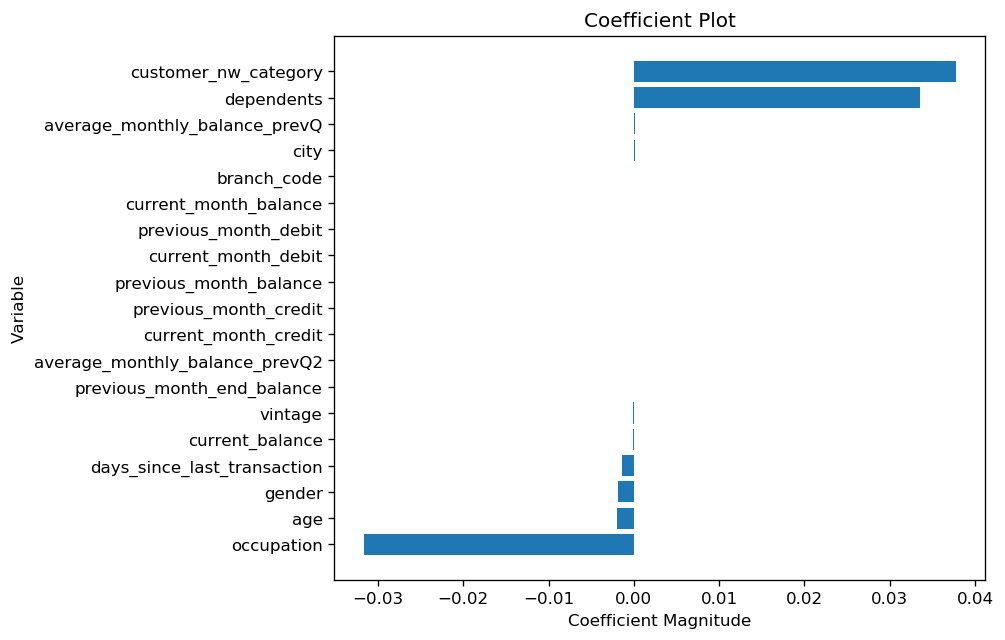

In [29]:
plt.figure(figsize=(7,6),dpi=120)
plt.barh(coefficient_plot['Variable'],coefficient_plot['coeff'])
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Variable')
plt.title('Coefficient Plot')